<a href="https://colab.research.google.com/github/SilverSurferClash/Sales_analysis/blob/main/Import_clean_SFDC_script.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
#!pip freeze > requirements.txt

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('dark_background')
import seaborn as sns
import os
pd.set_option('display.max_columns', None)
#pd.set_option('display.max_rows', None)
pd.set_option('display.precision', 2)
#Use option to round floats to two decimals
#pd.set_option('display.float_format',  '{:,.2f}'.format)
# Use option to display $ dollars
#pd.set_option('display.float_format', '${:.2f}'.format)

# Plotting pretty figures and avoid blurry images
#%config InlineBackend.figure_format = 'retina'
# Larger scale for plots in notebooks
#sns.set_context('notebook')


# Enable multiple cell outputs
#from IPython.core.interactiveshell import InteractiveShell
#InteractiveShell.ast_node_interactivity = 'all'

import warnings
warnings.filterwarnings('ignore')              


In [4]:
os.getcwd()

'/content'

In [5]:
os.chdir("/content/drive/MyDrive/Colab_Notebooks/Sales_Analysis")

#### Helper function

In [6]:
#Create a function that use the second element if the list has a length of 2 other return unknown

def clean_up_account(list_of_names):

  if len(list_of_names) == 2:
    return list_of_names[1]
  else:
    return list_of_names[0]


In [7]:
#Create a function to clean up the Billing type feature


Import helper data

In [8]:
#Import lookup table for countries
lookup_countries = pd.read_excel("./lookup.xlsx", sheet_name = 0)
#Import the data from SFDC as a excel file
import_sfdc = pd.read_excel("./All Data EUAA-2022-10-25-12-29-00.xlsx", sheet_name = 0, 
                            skiprows = 10)
#Create dictionairy for maping the lookup value
country_dict = dict(zip(lookup_countries["Reporting_Country_short"], lookup_countries["Account_Reporting_Country"]))
#Import lookup table for countries
lookup_type = pd.read_excel("./lookup.xlsx", sheet_name = "Type")
#Create dictionairy for maping the lookup values for LIMS ID
type_dict = dict(zip(lookup_type["LIMS Project ID"], lookup_type["Type"]))

#Import lookup Cancer Type
lookup_cancer_type = pd.read_excel("./lookup.xlsx", sheet_name = "Cancer_type")
cancer_type_dict = dict(zip(lookup_cancer_type["Old"], lookup_cancer_type["New"]))

#Inport lookun Billing_type - Needs further work
#lookup_billing_type = pd.read_excel("./lookup.xlsx", sheet_name = "Billing_type")
#billing_type_dict = dict(zip(lookup_billing_type["Billing Type"], lookup_billing_type["Billing Type.1"]))


In [9]:
#Identify which LIMS id are not in the lookup
unique_LIMS_id = list(set(import_sfdc["LIMS Project ID"]))
unique_lookup_id = list(set(lookup_type["LIMS Project ID"]))
list(set(unique_LIMS_id) - set(unique_lookup_id ))

[nan, 'OCT_1R', 'GAP_09', 'GAP_04', 'RHI_04', 'AZN_test_96', 'JNS_01']

In [10]:
import_sfdc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14982 entries, 0 to 14981
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             0 non-null      float64
 1   Accession #            14980 non-null  object 
 2   Unnamed: 2             1 non-null      object 
 3   Reporting Country      14978 non-null  object 
 4   Billing Type           14949 non-null  object 
 5   LIMS Project ID        14977 non-null  object 
 6   Account: Account Name  14977 non-null  object 
 7   Contact: Full Name     14977 non-null  object 
 8   Date Received          14977 non-null  object 
 9   Final Report Date      13479 non-null  object 
 10  Test Type              14977 non-null  object 
 11  Cancer Type            14538 non-null  object 
dtypes: float64(1), object(11)
memory usage: 1.4+ MB


#### Import and clean up the data from SFDC

In [11]:

#Remove the first two columns
import_sfdc = import_sfdc.drop(["Unnamed: 0", "Unnamed: 2"], axis = 1)
#Drop the last five rows
import_sfdc = import_sfdc.iloc[0:-5]
#Cast Date Received to datetime object 
import_sfdc["Date Received"] = pd.to_datetime(import_sfdc["Date Received"])
#Clean up the type column
import_sfdc["Type"] = import_sfdc["LIMS Project ID"].map(type_dict)

#Replace the two letter country code with the full country name
import_sfdc["Reporting Country"] = import_sfdc["Reporting Country"].map(country_dict)
#Clean up the cancer types and reduce number of categories
import_sfdc["Cancer Type"] = import_sfdc["Cancer Type"].map(cancer_type_dict)
#Clean up the Account column by removing all strings before the ":"
import_sfdc["Account: Account Name"] = import_sfdc.loc[:, "Account: Account Name"].str.split(":").apply(clean_up_account)
#Clean up the Billing type column 
#import_sfdc["Billing Type"] = import_sfdc["Billing Type"].map(billing_type_dict)
#import_sfdc.tail(6)

# Set the date recieved as date index
import_sfdc = import_sfdc.set_index("Date Received")

import_sfdc.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 14977 entries, 2019-11-25 to 2021-01-20
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Accession #            14977 non-null  object
 1   Reporting Country      14977 non-null  object
 2   Billing Type           14949 non-null  object
 3   LIMS Project ID        14977 non-null  object
 4   Account: Account Name  14977 non-null  object
 5   Contact: Full Name     14977 non-null  object
 6   Final Report Date      13479 non-null  object
 7   Test Type              14977 non-null  object
 8   Cancer Type            5343 non-null   object
 9   Type                   14873 non-null  object
dtypes: object(10)
memory usage: 1.3+ MB


In [12]:
import_sfdc["LIMS Project ID"]

Date Received
2019-11-25    AMG_01
2019-11-26    AMG_01
2019-11-29    AMG_01
2019-11-30    AMG_01
2019-11-30    AMG_01
               ...  
2021-01-04    VLT_01
2021-01-11    VLT_01
2021-01-11    VLT_01
2021-01-15    VLT_01
2021-01-20    VLT_01
Name: LIMS Project ID, Length: 14977, dtype: object

In [13]:
#Create date and time features

#Create a year, month, quarter variable
import_sfdc["Month"] = import_sfdc.index.month
import_sfdc["Year"] = import_sfdc.index.year
import_sfdc['Quarter'] = import_sfdc.index.quarter
#Other feature engineering based on feature analysis below
import_sfdc['Sales'] = 1

#create a Year Month columns
import_sfdc['Year_Month'] = import_sfdc.index.to_period('M')
#Cast the Year_Month column to a str
import_sfdc['Year_Month'] = import_sfdc['Year_Month'].astype(str)
import_sfdc['Year_Month'] = pd.to_datetime(import_sfdc['Year_Month'])
#Cast some features to categorical
#df['Reporting_Country'] = df['Reporting_Country'].astype('category')
import_sfdc['Type'] = import_sfdc['Type'].astype('category')


In [14]:
import_sfdc.sample(5)

,Accession #,Reporting Country,Billing Type,LIMS Project ID,Account: Account Name,Contact: Full Name,Final Report Date,Test Type,Cancer Type,Type,Month,Year,Quarter,Sales,Year_Month
Date Received,,,,,,,,,,,,,,,
2021-09-20,A0402447,SPAIN,Pharma : ROW,GAP_12,Hospital 12 de Octubre–G360 Research,Luis Paz Ares,10/1/2021,Guardant 360,NaN,GAP,9,2021,3,1,2021-09-01
2020-05-29,A0258577,IRELAND,Self-Pay Patient,GHI_01,Bon Secours Hospital,Brian Bird,6/4/2020,Guardant 360,Other,Commercial,5,2020,2,1,2020-05-01
2019-02-20,A0151464,POLAND,Pharma : ROW,VIS_01,Specjalistyczna Praktyka Lekarska,Slawomir Mandziuk,3/6/2019,Guardant 360,NaN,Biopharma,2,2019,1,1,2019-02-01
2019-12-21,A0222167,UNITED KINGDOM,Self-Pay Patient,GHI_01,Southampton General Hospital,Peter Simmonds,12/28/2019,Guardant 360,Breast,Commercial,12,2019,4,1,2019-12-01
2022-08-17,A0562518,UNITED KINGDOM,Self-Pay Patient,GHI_19,Singleton Hospital,Craig Barrington,8/24/2022,Guardant360 CDx EU,NaN,Commercial,8,2022,3,1,2022-08-01


#### Explore the data

In [15]:
import_sfdc["Reporting Country"].value_counts()

SPAIN              4759
UNITED KINGDOM     3360
FRANCE             1367
ITALY              1210
CANADA              853
TURKEY              694
GERMANY             577
BRAZIL              479
POLAND              287
BELGIUM             268
HUNGARY             153
AUSTRIA             142
SWITZERLAND         127
MEXICO              112
IRELAND             110
CHILE                74
ARGENTINA            66
FINLAND              55
BELARUS              52
PORTUGAL             48
GREECE               39
UKRAINE              35
NETHERLANDS          33
DENMARK              13
PERU                 13
LITHUANIA            11
CZECH REPUBLIC       10
SWEDEN                9
SLOVENIA              7
ROMANIA               5
COLOMBIA              4
NORTH MACEDONIA       2
CROATIA               1
LUXEMBOURG            1
COSTA RICA            1
Name: Reporting Country, dtype: int64

In [16]:
import_sfdc.Type.value_counts()

Biopharma                  6305
Commercial                 3859
Lunar                      1801
GAP                        1778
GH Trials (Prospective)    1130
Name: Type, dtype: int64

In [17]:
import_sfdc.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 14977 entries, 2019-11-25 to 2021-01-20
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Accession #            14977 non-null  object        
 1   Reporting Country      14977 non-null  object        
 2   Billing Type           14949 non-null  object        
 3   LIMS Project ID        14977 non-null  object        
 4   Account: Account Name  14977 non-null  object        
 5   Contact: Full Name     14977 non-null  object        
 6   Final Report Date      13479 non-null  object        
 7   Test Type              14977 non-null  object        
 8   Cancer Type            5343 non-null   object        
 9   Type                   14873 non-null  category      
 10  Month                  14977 non-null  int64         
 11  Year                   14977 non-null  int64         
 12  Quarter                14977 non-null  int6

In [18]:
import_sfdc["Billing Type"].value_counts()

Pharma : ROW                              5631
Pharma : US                               2370
Self-Pay Patient                          1687
Distributors : ROW                        1610
Do Not Bill - LUNAR                       1199
Do Not Bill - Cancelled                    720
Clinical Trial : ROW                       685
Self-Pay Sponsored                         425
Research : ROW                             420
Do Not Bill - ROW                          160
Other                                       11
Do Not Bill - Promotional                   10
Private Insurance/Employee Health Plan       8
Do Not Bill - Medical Affairs                7
Clinical Trial : US                          5
Research : US                                1
Name: Billing Type, dtype: int64

In [19]:
import_sfdc["Test Type"].value_counts()

Guardant 360            12793
LUNAR1_CRC                766
LUNAR2                    643
LUNAR1_3                  402
Guardant360 CDx EU        371
Guardant360 Response        1
Guardant360 CDx             1
Name: Test Type, dtype: int64

In [20]:
import_sfdc["Cancer Type"].value_counts()

Breast                     3235
Other                       811
Bladder                     557
GI                          410
CUP                          84
Lung                         53
Thyroid                      32
Skin                         32
Soft Tissue/Bone             30
Kidney                       26
Head and neck carcinoma      23
Urothelial                   17
Brain                        15
Cervical                     12
CRC                           5
Ovarian                       1
Name: Cancer Type, dtype: int64

In [21]:
import_sfdc['Billing Type'].value_counts()

Pharma : ROW                              5631
Pharma : US                               2370
Self-Pay Patient                          1687
Distributors : ROW                        1610
Do Not Bill - LUNAR                       1199
Do Not Bill - Cancelled                    720
Clinical Trial : ROW                       685
Self-Pay Sponsored                         425
Research : ROW                             420
Do Not Bill - ROW                          160
Other                                       11
Do Not Bill - Promotional                   10
Private Insurance/Employee Health Plan       8
Do Not Bill - Medical Affairs                7
Clinical Trial : US                          5
Research : US                                1
Name: Billing Type, dtype: int64

#### Plotting

In [22]:
#Select the features for the analysis
import_sfdc.columns.to_list()
list_for_country_analysis = ['Accession #',
 'Reporting Country',
 'Type',
 'Sales',
 'Year_Month']

countries_df = import_sfdc.loc[:,list_for_country_analysis ]
#countries_df["Reporting Country"] = countries_df["Reporting Country"].astype('category')
countries_df.sample(3)

,Accession #,Reporting Country,Type,Sales,Year_Month
Date Received,,,,,
2020-09-11,A0286706,SPAIN,Biopharma,1,2020-09-01
2021-07-08,A0373964,SPAIN,Lunar,1,2021-07-01
2021-03-12,A0336767,SPAIN,Commercial,1,2021-03-01


In [23]:
countries_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 14977 entries, 2019-11-25 to 2021-01-20
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Accession #        14977 non-null  object        
 1   Reporting Country  14977 non-null  object        
 2   Type               14873 non-null  category      
 3   Sales              14977 non-null  int64         
 4   Year_Month         14977 non-null  datetime64[ns]
dtypes: category(1), datetime64[ns](1), int64(1), object(2)
memory usage: 599.9+ KB


In [24]:
#Plot the total number of by country over time

In [25]:
#Select the time horizion to analyse
start_date = "2020"
end_date = "2022-08"
#Select the # of countries to be analyses based on the maxiumum number of samplesin 
#the time horizon
num_countries = 6
#Create the dataframe relevant for the time periode which should be analysed
countries_df = countries_df.loc[start_date:end_date].copy()
print(f"The number of samples in this dataframe is {countries_df.shape[0]}")

The number of samples in this dataframe is 11197


In [26]:
#Create a dataframe with just the topx countries by number of tests sold
top_x = countries_df.groupby('Reporting Country').sum().sort_values("Sales",ascending = False).head(num_countries)
top_x_list = top_x.index.tolist()
top_x_sales =countries_df[countries_df['Reporting Country'].isin(top_x_list)]
print(f"The top 5 countries have {top_x_sales.shape[0]} samples which represents {top_x_sales.shape[0]/countries_df.shape[0]:.2%}")

The top 5 countries have 9260 samples which represents 82.70%


In [27]:
countries_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 11197 entries, 2020-02-27 to 2021-01-20
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Accession #        11197 non-null  object        
 1   Reporting Country  11197 non-null  object        
 2   Type               11185 non-null  category      
 3   Sales              11197 non-null  int64         
 4   Year_Month         11197 non-null  datetime64[ns]
dtypes: category(1), datetime64[ns](1), int64(1), object(2)
memory usage: 448.5+ KB


In [28]:
grouped_countries = top_x_sales.groupby(["Reporting Country", 'Year_Month']).sum().reset_index()

In [29]:
grouped_countries.head()

,Reporting Country,Year_Month,Sales
0,CANADA,2020-01-01,22
1,CANADA,2020-02-01,29
2,CANADA,2020-03-01,20
3,CANADA,2020-04-01,13
4,CANADA,2020-05-01,10


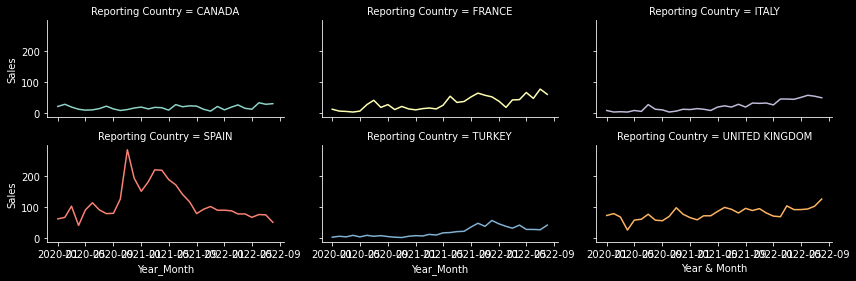

In [30]:

sns.relplot( data = grouped_countries, y = "Sales", x = "Year_Month", kind = "line", 
            hue = "Reporting Country" , col = "Reporting Country",
            col_wrap=3, height=2, aspect=2, legend=False)

plt.ylabel('Monthly Count')
plt.xlabel('Year & Month')

plt.show()

#### Use the subplots method

In [31]:
grouped_countries.head()

,Reporting Country,Year_Month,Sales
0,CANADA,2020-01-01,22
1,CANADA,2020-02-01,29
2,CANADA,2020-03-01,20
3,CANADA,2020-04-01,13
4,CANADA,2020-05-01,10


In [32]:
 t = grouped_countries.groupby(["Reporting Country", "Year_Month"]).sum().unstack(0)
 t

Sales                                         
Reporting Country CANADA FRANCE ITALY SPAIN TURKEY UNITED KINGDOM
Year_Month                                                       
2020-01-01            22     13     9    62      3             73
2020-02-01            29      7     4    67      6             79
2020-03-01            20      6     5   103      4             68
2020-04-01            13      4     4    41      9             26
2020-05-01            10      7     9    91      4             58
2020-06-01            11     28     6   114      9             61
2020-07-01            15     42    28    91      6             77
2020-08-01            23     19    13    79      8             58
2020-09-01            14     28    11    80      5             56
2020-10-01             9     12     4   126      3             70
2020-11-01            12     22     7   285      2             98
2020-12-01            17     14    13   193      6             77
2021-01-01            20     11    12   151      8             66
2021-02-01            14     15    15   182      7             59
2021-03-01            19     17    13   220     12             72
2021-04-01            18     14     9   219     10             72
2021-05-01            10     26    20   189     17             86
2021-06-01            28     55    24   172     18             99
2021-07-01            21     35    20   141     21             93
2021-08-01            24     38    29   117     22             81
2021-09-01            23     53    20    79     36             96
2021-10-01            13     65    33    93     48             89
2021-11-01             7     58    32   102     38             95
2021-12-01            22     53    33    90     57             81
2022-01-01            11     39    27    90     46             71
2022-02-01            20     19    46    88     38             69
2022-03-01            27     43    46    78     32            104
2022-04-01            16     44    45    78     42             92
2022-05-01            13     67    51    67     28             92
2022-06-01            34     48    58    76     28             94
2022-07-01            29     78    55    75     27            103
2022-08-01            31     61    50    51     42            126

In [35]:
col_list = list(t.columns)
col_list


[('Sales', 'CANADA'),
 ('Sales', 'FRANCE'),
 ('Sales', 'ITALY'),
 ('Sales', 'SPAIN'),
 ('Sales', 'TURKEY'),
 ('Sales', 'UNITED KINGDOM')]

In [36]:
t.index

DatetimeIndex(['2020-01-01', '2020-02-01', '2020-03-01', '2020-04-01',
               '2020-05-01', '2020-06-01', '2020-07-01', '2020-08-01',
               '2020-09-01', '2020-10-01', '2020-11-01', '2020-12-01',
               '2021-01-01', '2021-02-01', '2021-03-01', '2021-04-01',
               '2021-05-01', '2021-06-01', '2021-07-01', '2021-08-01',
               '2021-09-01', '2021-10-01', '2021-11-01', '2021-12-01',
               '2022-01-01', '2022-02-01', '2022-03-01', '2022-04-01',
               '2022-05-01', '2022-06-01', '2022-07-01', '2022-08-01'],
              dtype='datetime64[ns]', name='Year_Month', freq=None)

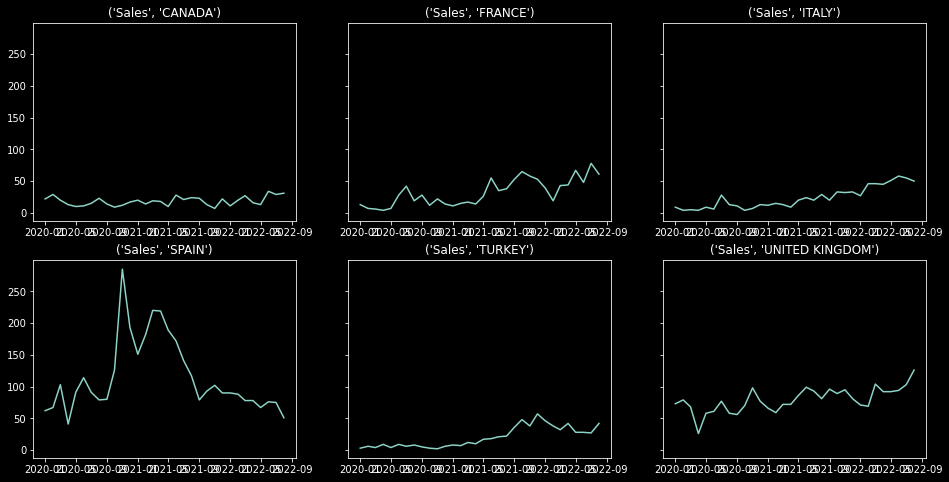

In [39]:
fig, axes = plt.subplots(2, 3, figsize=(16, 8), sharey = True)

for col, ax in zip(col_list, axes.flatten()):
   ax.plot(t.index, t[col])
   ax.set_title(col)

In [ ]:
for i, var in enumerate(categorical_vars):
    row = i//2
    print(row)
    pos = i % 2
    print(pos)

In [ ]:
#Keep as an example for how to work with seaborn and matplotlip

plt.figure(figsize=(18, 12))
fig, axs = plt.subplots(3,2)
for i, (combi, df) in enumerate(grouped_countries.groupby(["Reporting Country"])):
  row = i//2
  pos = i % 2
  plot = sns.lineplot(data = df, x = "Year_Month", y = "Sales", ax = axs[row][pos] )
  plt.ylabel('Monthly Count')
  plt.xlabel('Year & Month')
  plt.xticks(rotation = 90)


 